# Polynomial Regression Example

## Importing the data

In [1]:
import pandas as pd
import numpy

In [2]:
syntheticdf_1 = pd.read_csv('data/synthetic-1.csv')
syntheticdf_2 = pd.read_csv('data/synthetic-2.csv')
syntheticdf_3 = pd.read_csv('data/synthetic-3.csv')

In [3]:
df_list = [syntheticdf_1, syntheticdf_2, syntheticdf_3]

for df in df_list:
    df.columns = ['x', 'y']

df_list[0]

,x,y
0,0.185335,3.203305
1,1.066434,4.340509
2,-1.980521,11.238557
3,-1.267863,5.441072
4,-1.228651,5.250218
...,...,...
94,1.031286,3.139627
95,0.852284,0.643492
96,-1.486425,5.207026
97,-1.424195,3.382489


# Plot the Dataframes

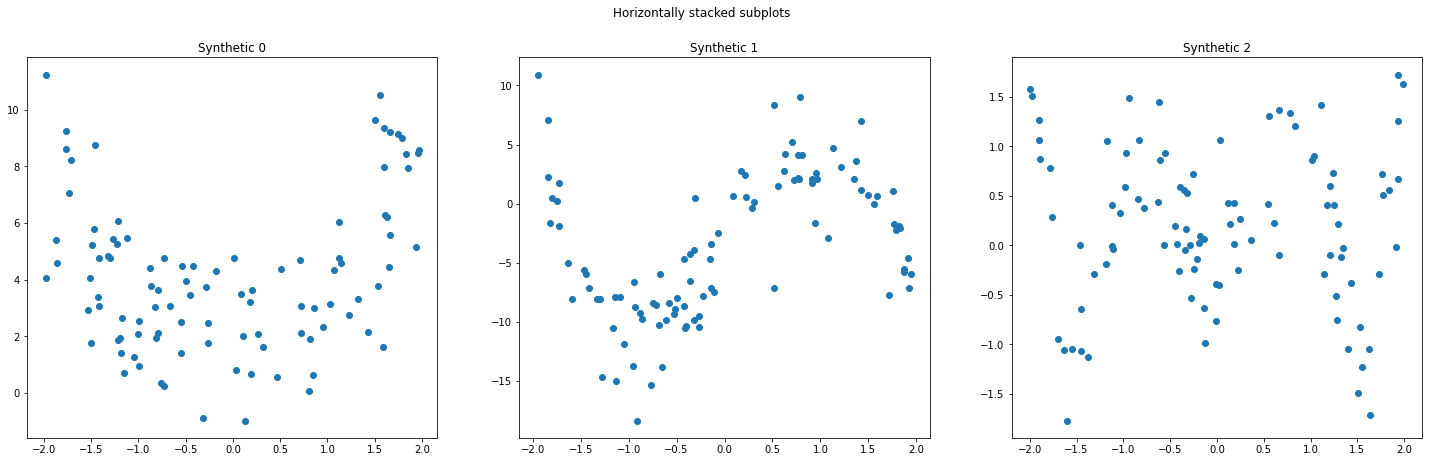

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize = (25,7))
fig.suptitle('Horizontally stacked subplots')
for index, ax in enumerate(axs):
    ax.set_title('Synthetic ' + str(index))  
    ax.scatter(df_list[index]['x'],df_list[index]['y'])

# Testing Polynomial Class

In [5]:
import poly_reg as pr
import numpy as np

#Make a Polynomial

poly = np.poly1d([1,0,0])

print(poly)


   2
1 x


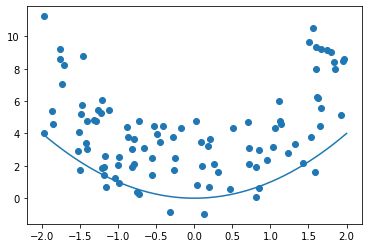

In [6]:
x_data = syntheticdf_1['x']
y_data = syntheticdf_1['y']

x = np.linspace(-2,2)
y = poly(x)

plt.plot(x,y)
plt.scatter(x_data,y_data)

# More Testing

In [7]:
pr.MSE(x_data,y_data,poly)

11.56765499411301

In [8]:
twos = np.array([2,2,2,2])

Epoch[0] : MSE = 19.227735870808274
Epoch[100] : MSE = 16.881600757235844
Epoch[200] : MSE = 15.024158580002322
Epoch[300] : MSE = 13.44214851640617
Epoch[400] : MSE = 12.247759849846004
Epoch[500] : MSE = 11.26266285558893
Epoch[600] : MSE = 10.512952094309021
Epoch[700] : MSE = 9.87190359753785
Epoch[800] : MSE = 9.33362527180995
Epoch[900] : MSE = 8.888247379853278


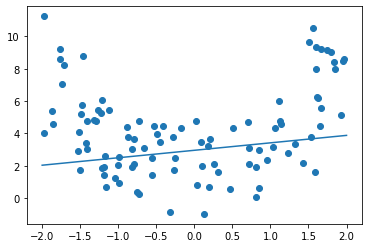

In [9]:
# How about a different polynomial

poly = np.poly1d([2,0,2])

pr.MSE(x_data,y_data,poly)

pr.MSEderiv(x_data,y_data,poly,1)

poly = pr.poly_reg(x_data,y_data, 1 , 0.001, 1000, 20)

x = np.linspace(-2,2)
y = poly(x)

plt.plot(x,y)
plt.scatter(x_data,y_data)


# Training

In [10]:
polynomial_orders = [1, 2, 4, 7]
polynomials = []
# Lets loop and regress all polinomials needed for this assignment

for df in df_list:
    X = df['x']
    Y = df['y']

    p_list = []
    
    for order in polynomial_orders:
        p_list.append( pr.poly_reg(X,Y, order , 0.001, 1200, 40) )

    polynomials.append(p_list)

Epoch[0] : MSE = 21.732598755039035
Epoch[100] : MSE = 19.1177115805898
Epoch[200] : MSE = 16.91516418014254
Epoch[300] : MSE = 15.15310108671764
Epoch[400] : MSE = 13.679537383917367
Epoch[500] : MSE = 12.490632530141387
Epoch[600] : MSE = 11.51915490895907
Epoch[700] : MSE = 10.710627582144738
Epoch[800] : MSE = 10.05967548688208
Epoch[900] : MSE = 9.511648520376806
Epoch[1000] : MSE = 9.074581438048407
Epoch[1100] : MSE = 8.704390752364025
Epoch[0] : MSE = 11.476616979148508
Epoch[100] : MSE = 7.27682795683382
Epoch[200] : MSE = 5.399582258441008
Epoch[300] : MSE = 4.603415047875706
Epoch[400] : MSE = 4.228207193759761
Epoch[500] : MSE = 4.019727568311348
Epoch[600] : MSE = 3.9278309745837796
Epoch[700] : MSE = 3.8748234242010597
Epoch[800] : MSE = 3.849510827562593
Epoch[900] : MSE = 3.8272884725263085
Epoch[1000] : MSE = 3.81511883439562
Epoch[1100] : MSE = 3.8036646693064844
Epoch[0] : MSE = 12.554923530332706
Epoch[100] : MSE = 7.172412235271537
Epoch[200] : MSE = 6.580145289705

In [11]:
polynomials

[[poly1d([0.26544394, 3.01897996]),
  poly1d([1.69887487, 0.32390689, 1.5857616 ]),
  poly1d([0.30623976, 0.03732659, 0.91352849, 0.10349546, 1.138954  ]),
  poly1d([-0.05832929, -0.10988979,  0.19709355,  0.62571648,  0.01740884,
          1.21393978, -0.13414762,  1.19490688])],
 [poly1d([ 1.71853671, -2.21054757]),
  poly1d([-0.52846377,  1.68354994, -1.75412678]),
  poly1d([ 0.34082669, -0.7414611 , -1.04882995,  2.34104489, -2.01582776]),
  poly1d([-0.41388747,  0.36210038,  0.59038002, -0.87545944,  1.36421067,
         -0.48557346,  2.51461982, -1.97725833])],
 [poly1d([0.12260305, 0.28148544]),
  poly1d([0.03235034, 0.074     , 0.13739649]),
  poly1d([ 0.02302459, -0.15796164, -0.04568486,  0.44549804,  0.25343498]),
  poly1d([ 0.07098602,  0.05100361, -0.41633232, -0.17678686,  0.43231964,
          0.12789932,  0.17170887,  0.1023743 ])]]

# Graphing the Polynomials

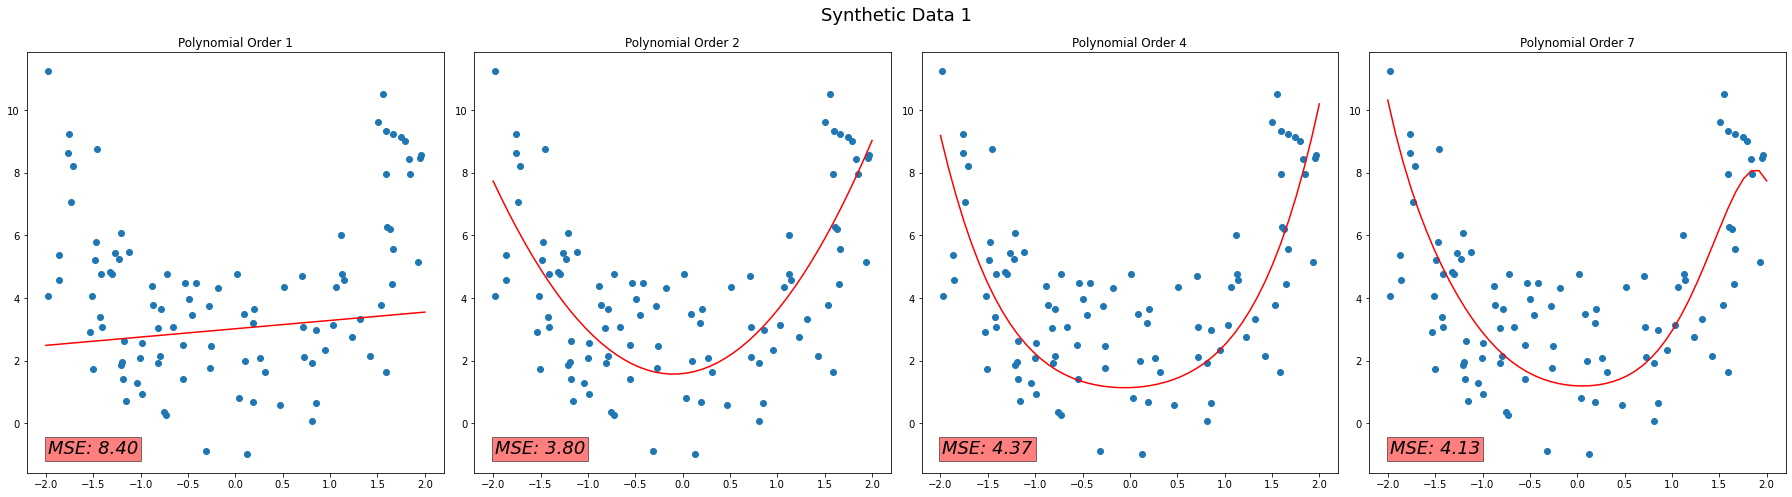

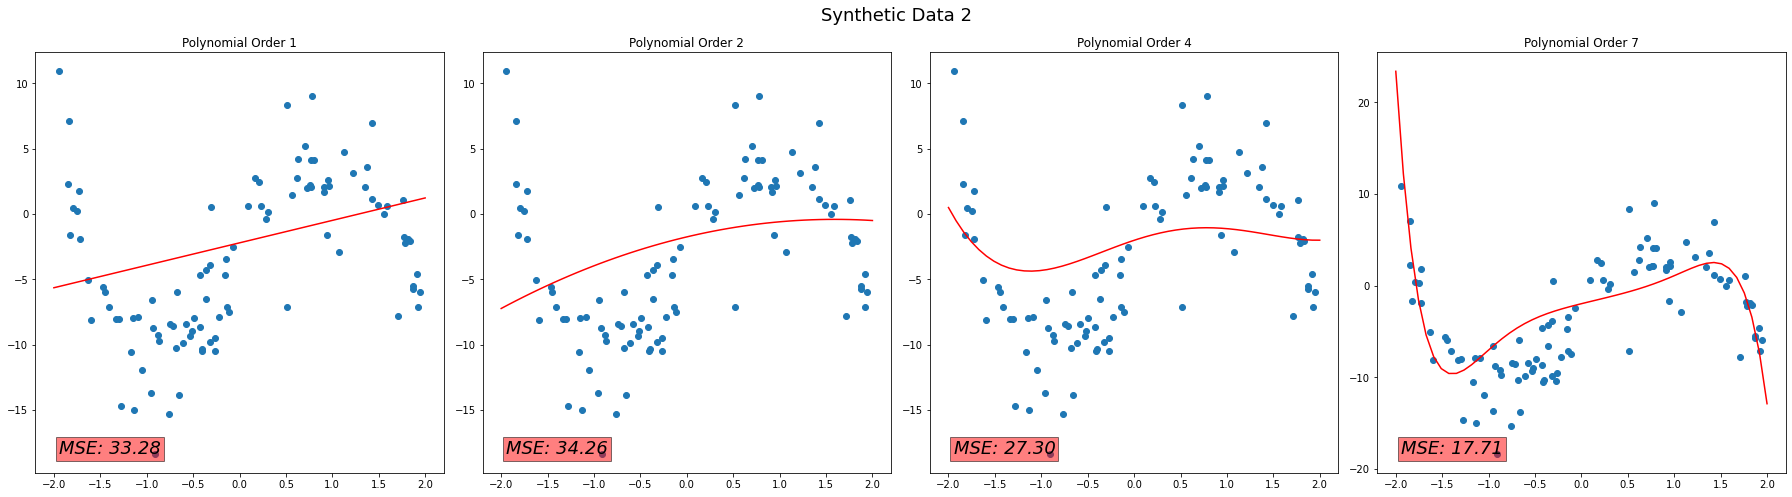

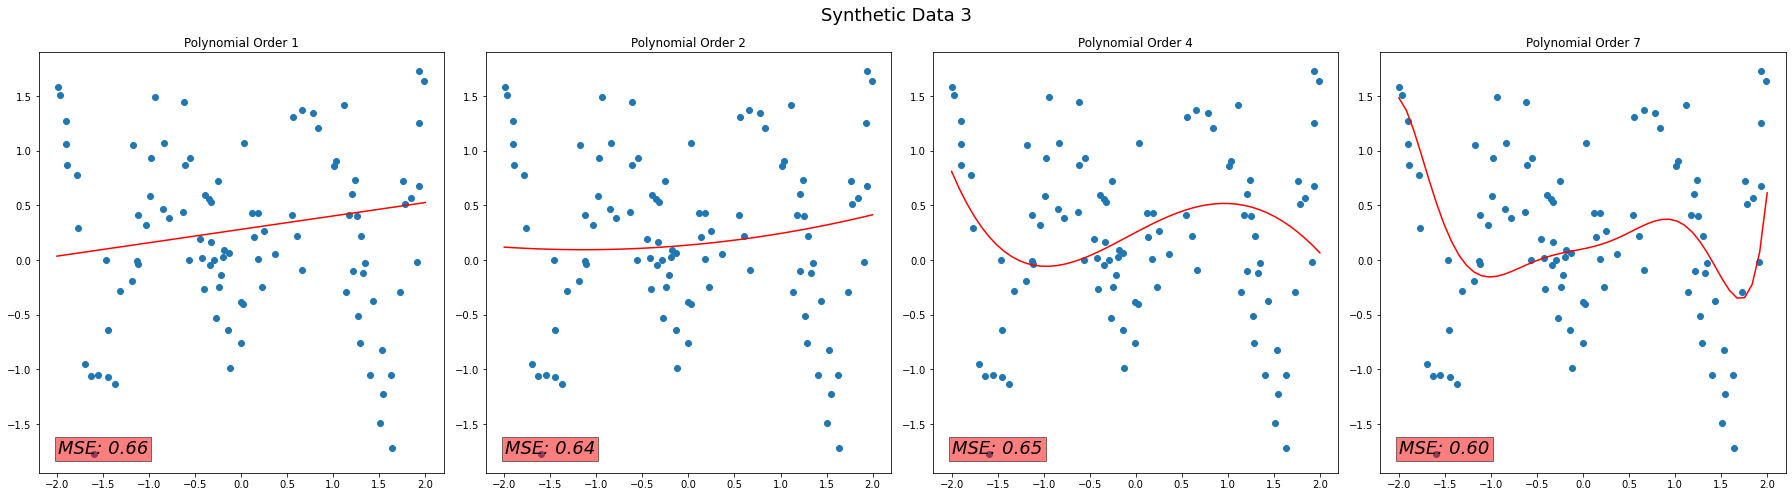

In [12]:
# Graph Each dataset in a row
for df_i,df in enumerate(df_list):
    fig, axs = plt.subplots(1, 4, figsize = (25,7))
    fig.suptitle(f'Synthetic Data {df_i + 1}', fontsize = 18)

    for index, ax in enumerate(axs):
        ax.set_title(f'Polynomial Order {polynomial_orders[index]}')

        #plot the data 
        X,Y = df['x'],df['y']
        ax.scatter(X,Y)

        #Calculate poly , label MSE
        poly = polynomials[df_i][index]
        ax.text(min(X), min(Y), f'MSE: {pr.MSE(X,Y, poly):0.2f}', style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3}, fontsize = 18)

        # Plot the Line
        x = np.linspace(-2,2)
        y = poly(x)
        ax.plot(x,y, c ='r')

    plt.tight_layout()

plt.show()

In [32]:
# Printing the functions neatly
for i,df in enumerate(df_list):
    print(f'Synthetic Data {i}')
    print("`````````````````````````````````````")
    
    for j in range(0,4):
        print(f'Polynomial Order {polynomial_orders[j]}')
        print(str(polynomials[i][j]) + '\n')

    print("`````````````````````````````````````")


Synthetic Data 0
`````````````````````````````````````
Polynomial Order 1
 
0.2654 x + 3.019

Polynomial Order 2
       2
1.699 x + 0.3239 x + 1.586

Polynomial Order 4
        4           3          2
0.3062 x + 0.03733 x + 0.9135 x + 0.1035 x + 1.139

Polynomial Order 7
          7          6          5          4           3         2
-0.05833 x - 0.1099 x + 0.1971 x + 0.6257 x + 0.01741 x + 1.214 x - 0.1341 x + 1.195

`````````````````````````````````````
Synthetic Data 1
`````````````````````````````````````
Polynomial Order 1
 
1.719 x - 2.211

Polynomial Order 2
         2
-0.5285 x + 1.684 x - 1.754

Polynomial Order 4
        4          3         2
0.3408 x - 0.7415 x - 1.049 x + 2.341 x - 2.016

Polynomial Order 7
         7          6          5          4         3          2
-0.4139 x + 0.3621 x + 0.5904 x - 0.8755 x + 1.364 x - 0.4856 x + 2.515 x - 1.977

`````````````````````````````````````
Synthetic Data 2
`````````````````````````````````````
Polynomial Order 1
 
0.12